In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
def create_feature_vector(x1, x2, num_features):
    num_samples = len(x1)
    feature_vector = np.ones((num_samples, num_features))
    current_col = 1
    for i in range(1, 31):
        for j in range(i + 1):
            feature_vector[:, current_col] = (x1 ** (i - j)) * (x2 ** j)
            current_col += 1
    return feature_vector

def normalize(X):
    for i in range(1, X.shape[1]):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    return X

In [4]:
class Net():
    def __init__(self, epochs=50000, lr=0.5, reg_param=0):
        self.lr = lr
        self.epochs = epochs
        self.reg_param = reg_param
        self.weights = None
    
    def classify(self, predicted_values):
        return np.where(predicted_values >= 0.5, 1, 0)
    
    def f(self, z):
        return 1 / (1 + np.exp(-z))
    
    def regularization(self):
        if self.reg_param == 0:
            return (0, 0)
        l = self.reg_param * np.sum(self.weights[1:] ** 2)
        reg_grad = np.zeros_like(self.weights)
        reg_grad[1:] = 2 * self.reg_param * self.weights[1:]
        return (l, reg_grad)
    
    def loss(self, y_predicted, y_real):
        eps = 1e-15
        return -(1 / len(y_real)) * np.sum(y_real * np.log(y_predicted + eps) + (1 - y_real) * np.log(1 - y_predicted + eps)) + self.regularization()[0] / len(y_real)

    def fit(self, X, y):
        n = X.shape[0]
        m = X.shape[1]
        self.weights = np.zeros(m)
        loss_arr = np.array([])
        for _ in range(self.epochs):
            predicted_values = self.f(np.dot(X, self.weights))
            loss = self.loss(predicted_values, y)
            loss_arr = np.append(loss_arr, loss)
            grad = np.dot((predicted_values - y), X) / n + self.regularization()[1] / n
            self.weights -= self.lr * grad
        return loss_arr
    
    def predict(self, X):
        return self.classify(self.f(np.dot(X, self.weights)))
    
    def metrics(self, y_pred, y):
        TP = np.count_nonzero((y_pred == 1) & (y_pred == y))
        TN = np.count_nonzero((y_pred == 0) & (y_pred == y))
        FN = np.count_nonzero((y_pred == 0) & (y_pred != y))
        FP = np.count_nonzero((y_pred == 1) & (y_pred != y))
        return (TP + TN) / (TP + TN + FN + FP)

Text(0.5, 1.0, 'After normalization')

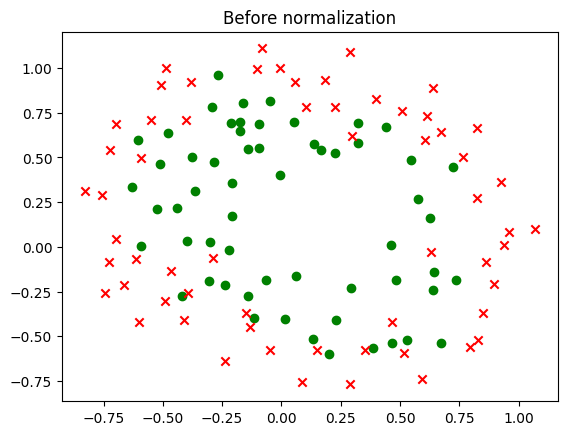

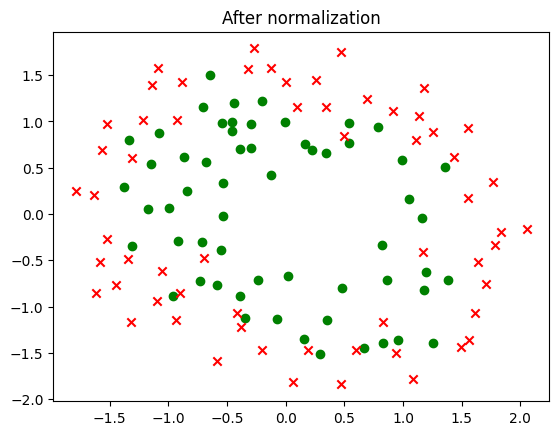

In [7]:
df = pd.read_csv("ex2data2.csv", names=['test1', 'test2', 'result'])
x1 = np.array(df['test1'])
x2 = np.array(df['test2'])
plt.figure()
for i in range(len(df['test1'])):
    if (df['result'][i] == 1):
        plt.scatter(df['test1'][i], df['test2'][i], color='green')
    else:
        plt.scatter(df['test1'][i], df['test2'][i], color='red', marker='x')
plt.title('Before normalization')
X = create_feature_vector(x1, x2, 496)
X = normalize(X)
y = df['result']
plt.figure()
for i in range(X.shape[0]):
    if (y[i] == 1):
        plt.scatter(X[i, 1], X[i, 2], color='green')
    else:
        plt.scatter(X[i, 1], X[i, 2], color='red', marker='x')
plt.title('After normalization')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [9]:
model_no_reg = Net()
loss_arr = model_no_reg.fit(X_train, y_train)
y_predicted_train = model_no_reg.predict(X_train)
y_predicted_test = model_no_reg.predict(X_test)
print(f'Точность для тренировочной выборки без регуляризации: {model_no_reg.metrics(y_predicted_train, y_train)}')
print(f'Точность для тестовой выборки без регуляризации: {model_no_reg.metrics(y_predicted_test, y_test)}')

model_reg = Net(reg_param=1)
loss_arr = model_reg.fit(X_train, y_train)
y_predicted_train_reg = model_reg.predict(X_train)
y_predicted_test_reg = model_reg.predict(X_test)
print(f'Точность для тренировочной выборки с регуляризацией: {model_reg.metrics(y_predicted_train_reg, y_train)}')
print(f'Точность для тестовой выборки с регуляризацией: {model_reg.metrics(y_predicted_test_reg, y_test)}')

Точность для тренировочной выборки без регуляризации: 0.9361702127659575
Точность для тестовой выборки без регуляризации: 0.6666666666666666
Точность для тренировочной выборки с регуляризацией: 0.851063829787234
Точность для тестовой выборки с регуляризацией: 0.7916666666666666


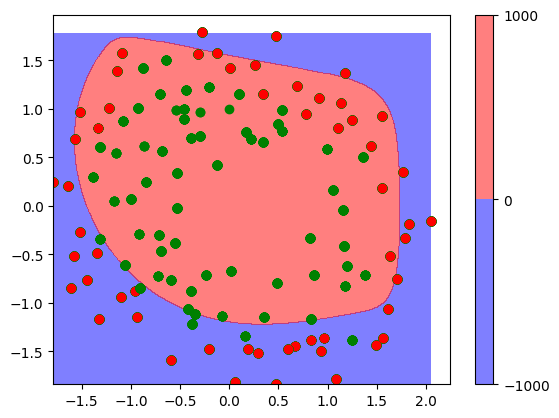

In [10]:
# Создаем сетку значений x1 и x2
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

feature_v = create_feature_vector(xx1.ravel(), xx2.ravel(), 496)
feature_v = normalize(feature_v)
Z = model_reg.predict(feature_v)
Z = Z.reshape(xx1.shape)

# Строим контур для границы принятия решения
plt.contourf(xx1, xx2, Z, alpha=0.5, levels = [-1000, 0, 1000], colors=['blue', 'red'])

plt.colorbar()

y_predicted_full = model_reg.predict(X)

for i in range(X.shape[0]):
    if (y_predicted_full[i] == 1):
        plt.scatter(X[i:, 1], X[i:, 2], color='green')
    else:
        plt.scatter(X[i, 1], X[i, 2], color='red')



/tmp/ipykernel_8310/310561196.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


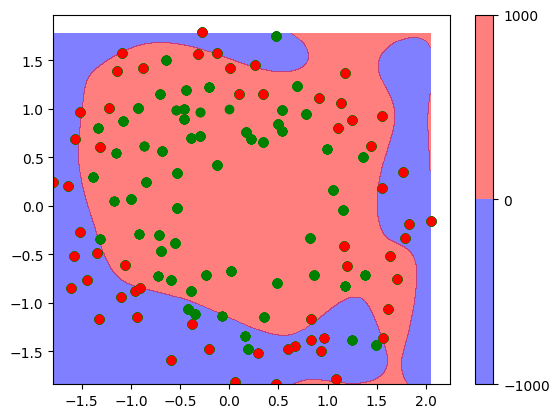

In [11]:
# Создаем сетку значений x1 и x2
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

feature_v = create_feature_vector(xx1.ravel(), xx2.ravel(), 496)
feature_v = normalize(feature_v)
Z = model_no_reg.predict(feature_v)
Z = Z.reshape(xx1.shape)

# Строим контур для границы принятия решения
plt.contourf(xx1, xx2, Z, alpha=0.5, levels = [-1000, 0, 1000], colors=['blue', 'red'])

plt.colorbar()

y_predicted_full = model_no_reg.predict(X)

for i in range(X.shape[0]):
    if (y_predicted_full[i] == 1):
        plt.scatter(X[i:, 1], X[i:, 2], color='green')
    else:
        plt.scatter(X[i, 1], X[i, 2], color='red')

